__Author: Md Fahim Hasan__

The model has contributions from `Thornton-Dunwoody, Alex (@ atdunwoody)`. The entire code can be found at this github link - https://github.com/mdfahimhasan/SVAT_EcoHydro

-----

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Plot functions

In [2]:
def make_single_line_plot(x, y, x_label, y_label, title, x_lim=None, y_lim=None):
    """
    Plot single line plot.
    
    :param x (list / df series): x-axis name. 
    :param y (list / df series): y-axis name. 
    :param x_label (str): x_label.
    :param y_label (str): y_label.
    :param title (str): title.
    :param x_lim / y_lim: List of x_lim/y_lim. Default set to None. 
    
    :return: Line plot.
    """
    # Plot gR wide layout with y min of 0
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.plot(x, y)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
   
    if x_lim is not None:
        ax.set_xlim(x_lim)
    if y_lim is not None:
        ax.set_ylim(y_lim) 
    
    plt.show()

def make_multiline_plot(x1, y1, label1,
                        x2, y2, label2,
                        x_label, y_label,title, 
                        x3=None, y3=None, label3=None,
                        x_lim=None, y_lim=None):
    """
    Plot multiline plot. Can at max plot 3 series.
    
    :param x (list / df series): x-axis name.  x3 set to None by default.
    :param y (list / df series): y-axis name. y3 set to None by default.
    :param x_label (str): x_label.
    :param y_label (str): y_label.
    :param title (str): title.
    :param x_lim / y_lim: List of x_lim/y_lim. Default set to None. 
    
    :return: Multi-line plot.
    """
    # Plot gR wide layout with y min of 0
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.plot(x1, y1, label=label1)
    ax.plot(x2, y2, label=label2)
    if x3 is not None:
        ax.plot(x3, y3, label=label3)
    
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
   
    if x_lim is not None:
        ax.set_xlim(x_lim)
    if y_lim is not None:
        ax.set_ylim(y_lim) 

    plt.legend()
    plt.show()

---------------------

# `Canopy:` Grass

In [3]:
grass_df = pd.read_csv('../results/grass.csv')
print(grass_df.columns)
grass_df.head()

Index(['Total Hour', 'Hour', 'SR_down', 'LW_down', 'Ta', 'wind_speed', 'q',
       'precip', 'ra', 'e', 'e_sat', 'VPD', 'gR', 'gD', 'gT', 'Lambda',
       'delta', 'psy_const', 'gSM', 'gS', 'rs', 'LW_up', 'Rn', 'Cinterim',
       'Cactual', 'Dcanopy', 'lambdaEi', 'Cfinal', 'lambdaEt', 'lambdaET', 'H',
       'Ts', 'SMlast', 'SMnew'],
      dtype='object')


,Total Hour,Hour,SR_down,LW_down,Ta,wind_speed,q,precip,ra,e,...,Cactual,Dcanopy,lambdaEi,Cfinal,lambdaEt,lambdaET,H,Ts,SMlast,SMnew
0,0.5,0.5,0,269.131,12.697,2.429,2.444,0,94.264140,0.397641,...,0.0,0.0,0.0,0.0,0.013213,0.013213,-49.882213,282.093211,10.000000,9.999981
1,1.5,1.5,0,271.000,13.160,2.390,2.030,0,95.802341,0.330283,...,0.0,0.0,0.0,0.0,0.015276,0.015276,-48.015276,282.638176,9.999981,9.999958
2,2.5,2.5,0,265.400,11.770,2.330,2.360,0,98.269354,0.383974,...,0.0,0.0,0.0,0.0,0.008284,0.008284,-77.026460,278.865039,9.999958,9.999946
3,3.5,3.5,0,265.100,11.700,2.310,2.190,0,99.120171,0.356315,...,0.0,0.0,0.0,0.0,0.009631,0.009631,-69.654029,279.328929,9.999946,9.999932
4,4.5,4.5,0,265.200,11.720,2.210,2.140,0,103.605247,0.348180,...,0.0,0.0,0.0,0.0,0.010513,0.010513,-61.645873,279.764087,9.999932,9.999917


#### gR, gD, gT

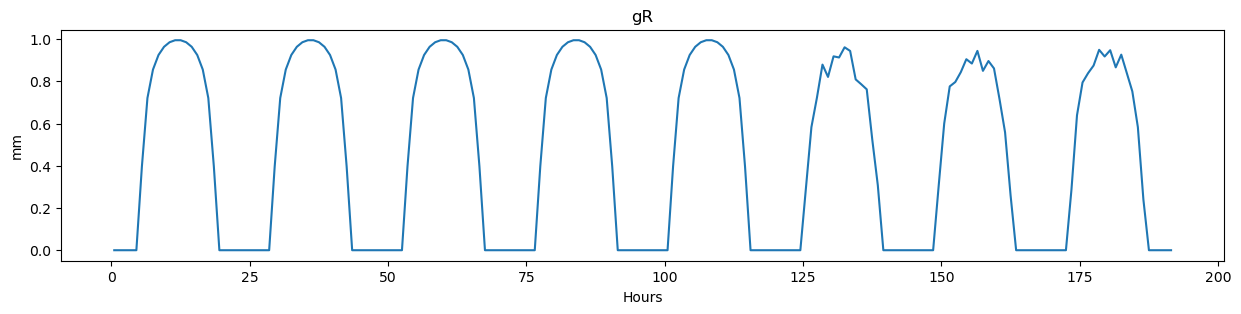

In [4]:
make_single_line_plot(x=grass_df['Total Hour'], y = grass_df['gR'], 
                      x_label='Hours', y_label='mm', title='gR')

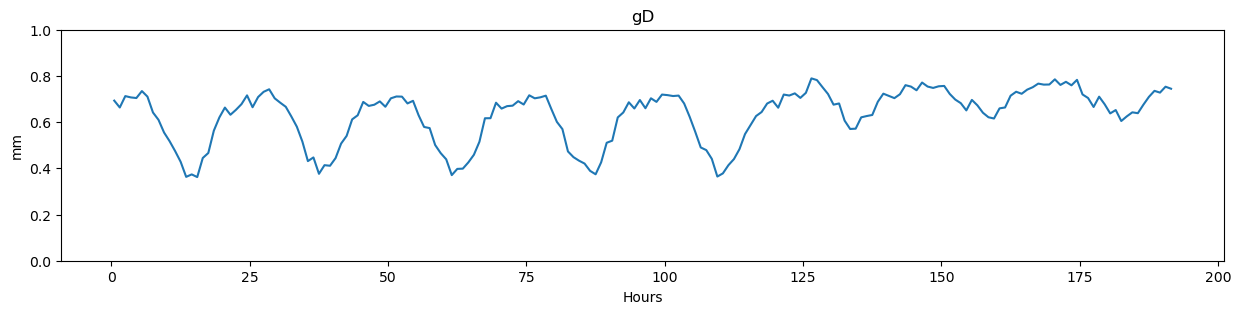

In [5]:
make_single_line_plot(x=grass_df['Total Hour'], y = grass_df['gD'], 
                      x_label='Hours', y_label='mm', title='gD', y_lim=[0, 1])

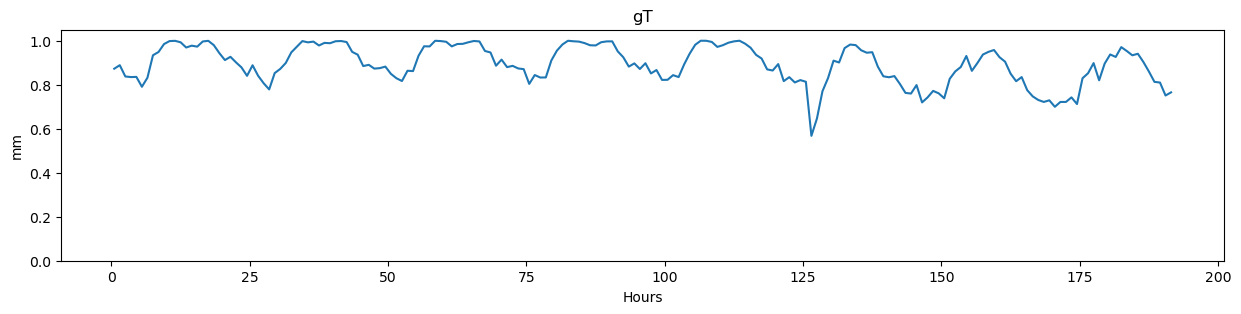

In [6]:
make_single_line_plot(x=grass_df['Total Hour'], y = grass_df['gT'], 
                      x_label='Hours', y_label='mm', title='gT', y_lim=[0, 1.05])

#### (I) Rn, labmdaET, and H

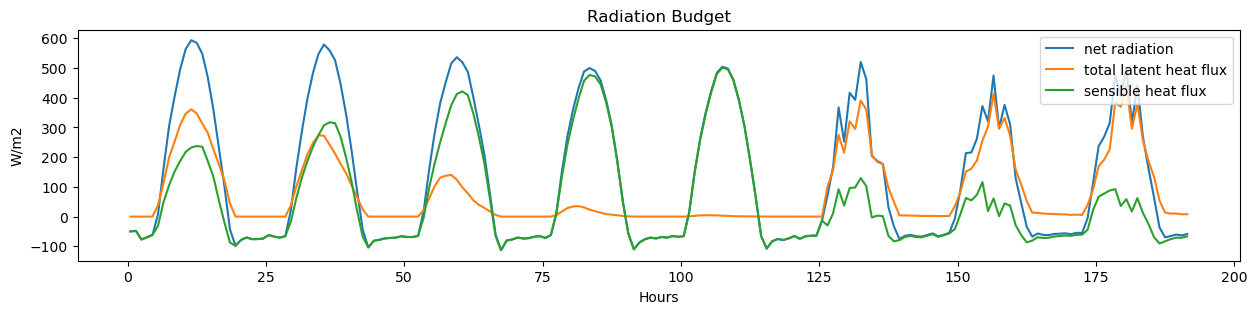

In [7]:
make_multiline_plot(x1=grass_df['Total Hour'], y1=grass_df['Rn'], label1='net radiation',
                    x2=grass_df['Total Hour'], y2=grass_df['lambdaET'], label2='total latent heat flux',
                    x3=grass_df['Total Hour'], y3=grass_df['H'], label3='sensible heat flux',
                    x_label='Hours', y_label='W/m2',
                    title='Radiation Budget', 
                    x_lim=None, y_lim=None)

#### (II) labmdaET and labmdaEi

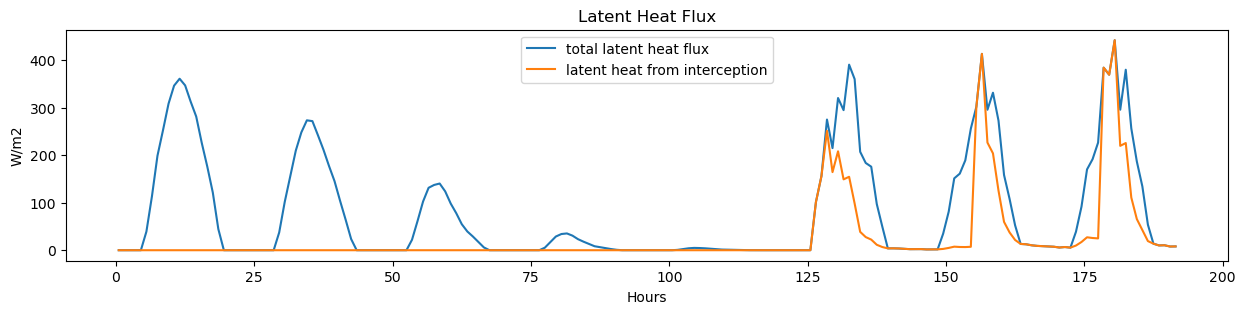

In [8]:
make_multiline_plot(x1=grass_df['Total Hour'], y1=grass_df['lambdaET'], label1='total latent heat flux',
                    x2=grass_df['Total Hour'], y2=grass_df['lambdaEi'], label2='latent heat from interception',
                    x3=None, y3=None, label3=None,
                    x_label='Hours', y_label='W/m2',
                    title='Latent Heat Flux', 
                    x_lim=None, y_lim=None)

#### (III) Precip and Canopy Storage

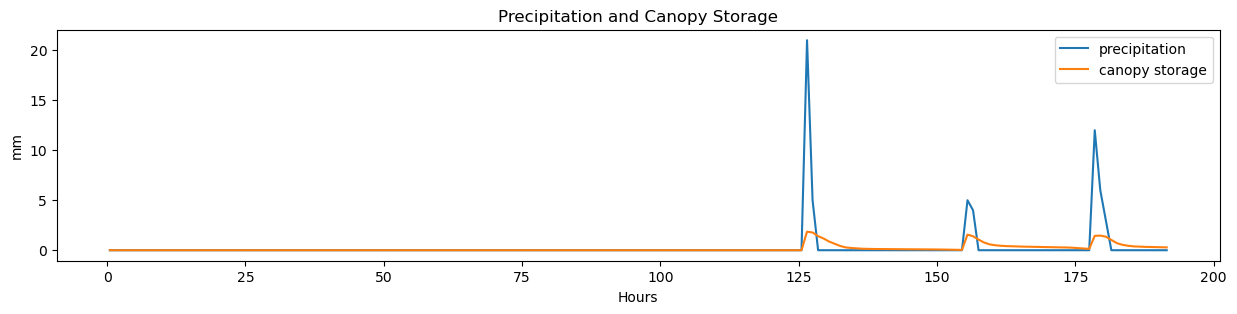

In [9]:
make_multiline_plot(x1=grass_df['Total Hour'], y1=grass_df['precip'], label1='precipitation',
                    x2=grass_df['Total Hour'], y2=grass_df['Cfinal'], label2='canopy storage',
                    x3=None, y3=None, label3=None,
                    x_label='Hours', y_label='mm',
                    title='Precipitation and Canopy Storage', 
                    x_lim=None, y_lim=None)

#### (IV) Canopy Drainage and Soil Moisture

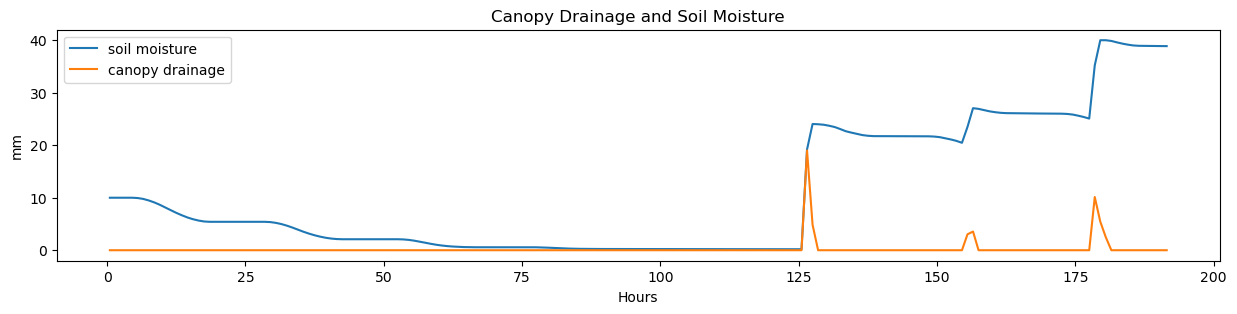

In [10]:
make_multiline_plot(x1=grass_df['Total Hour'], y1=grass_df['SMnew'], label1='soil moisture',
                    x2=grass_df['Total Hour'], y2=grass_df['Dcanopy'], label2='canopy drainage',
                    x3=None, y3=None, label3=None,
                    x_label='Hours', y_label='mm',
                    title='Canopy Drainage and Soil Moisture', 
                    x_lim=None, y_lim=None)

#### (V) gSM

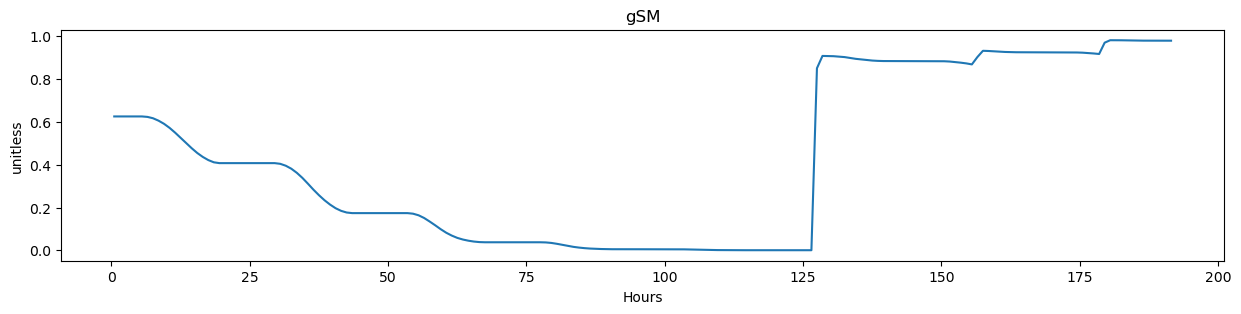

In [11]:
make_single_line_plot(x=grass_df['Total Hour'], y = grass_df['gSM'], 
                      x_label='Hours', y_label='unitless', title='gSM', y_lim=None)

#### (VI) Daily average fluxes 

In [15]:
# setting day number in the dataset
grass_df['day'] = (grass_df['Total Hour'] // 24)  + 1

In [20]:
daily_df_grass = grass_df.groupby('day')[['precip', 'Rn', 'lambdaET', 'H', 'lambdaEi']].mean()
daily_df_grass = daily_df_grass.reset_index()
daily_df_grass['Bowen Ratio'] = daily_df_grass['H'] / daily_df_grass['lambdaET']
daily_df_grass['Fractional contribution of intercepted water'] = daily_df_grass['lambdaEi'] / daily_df_grass['lambdaET']
daily_df_grass

,day,precip,Rn,lambdaET,H,lambdaEi,Bowen Ratio,Fractional contribution of intercepted water
0,1.0,0.000000,169.840927,130.338033,39.502894,0.000000,0.303080,0.000000
1,2.0,0.000000,160.759236,94.419193,66.340043,0.000000,0.702612,0.000000
2,3.0,0.000000,146.827766,43.379202,103.448564,0.000000,2.384750,0.000000
3,4.0,0.000000,137.002807,9.488904,127.513902,0.000000,13.438212,0.000000
4,5.0,0.000000,136.832765,1.285243,135.547522,0.000000,105.464502,0.000000
5,6.0,1.083333,105.550592,118.434627,-12.884034,58.589294,-0.108786,0.494697
6,7.0,0.375000,102.329511,119.606651,-17.277140,62.033500,-0.144450,0.518646
7,8.0,0.875000,121.896169,137.659095,-15.762926,86.121669,-0.114507,0.625616


At the beginning of simulation, soil water storage is maximum, and ET is maximum. The 1st 5 days of simulation has no rainfall, so all ET is sourced from available soil moisture. As soil moisture is the only source of water during the first 5 days, ET depletes with time during this period. Therefore, most of the net radiation becomes SH and SH increases in the first 5 days along with Bowen ratio. The 5th day of simulation has rainfall that replenishes soil moisture. This makes the soil wet and more of the net radiation goes toward latent heat, making SH negative. That’s why during the last 3 days of the simulation, SH is negative and so is the bowen ratio.

During the first 5 days of simulation, there was no rainfall. So, the contribution of intercepted water by canopy to ET is zero. As the last 3 days of simulation, rainfall occurs and canopy intercepts some of it. This intercepted water contributes toward ET and fraction contribution of intercepted water toward ET increases and comprises nearly half of ET


---------------

# `Canopy:` Forest

In [16]:
forest_df = pd.read_csv('../results/forest.csv')
print(forest_df.columns)
forest_df.head()

Index(['Total Hour', 'Hour', 'SR_down', 'LW_down', 'Ta', 'wind_speed', 'q',
       'precip', 'ra', 'e', 'e_sat', 'VPD', 'gR', 'gD', 'gT', 'Lambda',
       'delta', 'psy_const', 'gSM', 'gS', 'rs', 'LW_up', 'Rn', 'Cinterim',
       'Cactual', 'Dcanopy', 'lambdaEi', 'Cfinal', 'lambdaEt', 'lambdaET', 'H',
       'Ts', 'SMlast', 'SMnew'],
      dtype='object')


,Total Hour,Hour,SR_down,LW_down,Ta,wind_speed,q,precip,ra,e,...,Cactual,Dcanopy,lambdaEi,Cfinal,lambdaEt,lambdaET,H,Ts,SMlast,SMnew
0,0.5,0.5,0,269.131,12.697,2.429,2.444,0,14.968006,0.397641,...,0.0,0.0,0.0,0.0,0.018253,0.018253,-80.887253,284.895306,40.000000,39.999973
1,1.5,1.5,0,271.000,13.160,2.390,2.030,0,15.212254,0.330283,...,0.0,0.0,0.0,0.0,0.020312,0.020312,-79.020312,285.365243,39.999973,39.999944
2,2.5,2.5,0,265.400,11.770,2.330,2.360,0,15.603986,0.383974,...,0.0,0.0,0.0,0.0,0.016713,0.016713,-90.642753,283.804848,39.999944,39.999919
3,3.5,3.5,0,265.100,11.700,2.310,2.190,0,15.739085,0.356315,...,0.0,0.0,0.0,0.0,0.017154,0.017154,-88.242302,283.755342,39.999919,39.999895
4,4.5,4.5,0,265.200,11.720,2.210,2.140,0,16.451261,0.348180,...,0.0,0.0,0.0,0.0,0.017344,0.017344,-84.146152,283.778988,39.999895,39.999869


#### gR, gD, gT

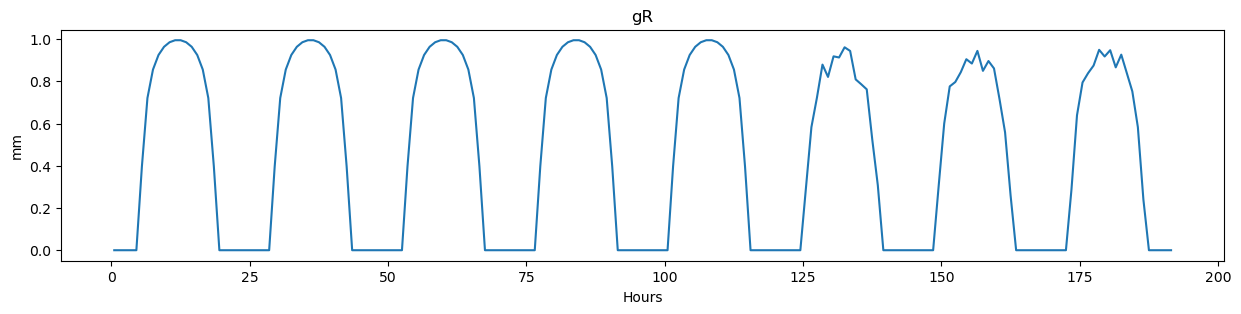

In [37]:
make_single_line_plot(x=forest_df['Total Hour'], y = forest_df['gR'], 
                      x_label='Hours', y_label='mm', title='gR')

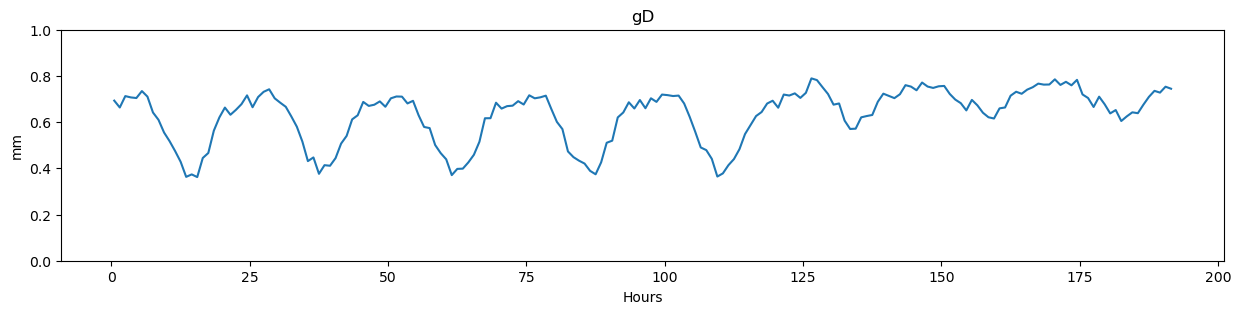

In [38]:
make_single_line_plot(x=forest_df['Total Hour'], y = forest_df['gD'], 
                      x_label='Hours', y_label='mm', title='gD', y_lim=[0, 1])

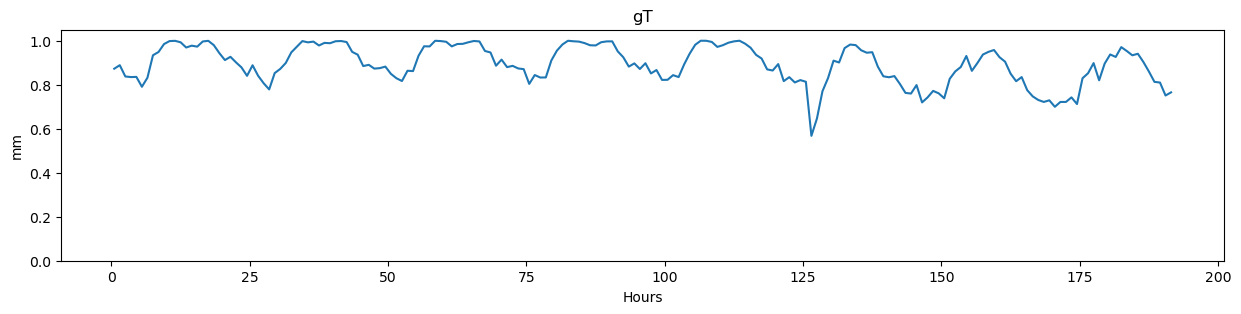

In [39]:
make_single_line_plot(x=forest_df['Total Hour'], y = forest_df['gT'], 
                      x_label='Hours', y_label='mm', title='gT', y_lim=[0, 1.05])

#### (I) Rn, labmdaET, and H

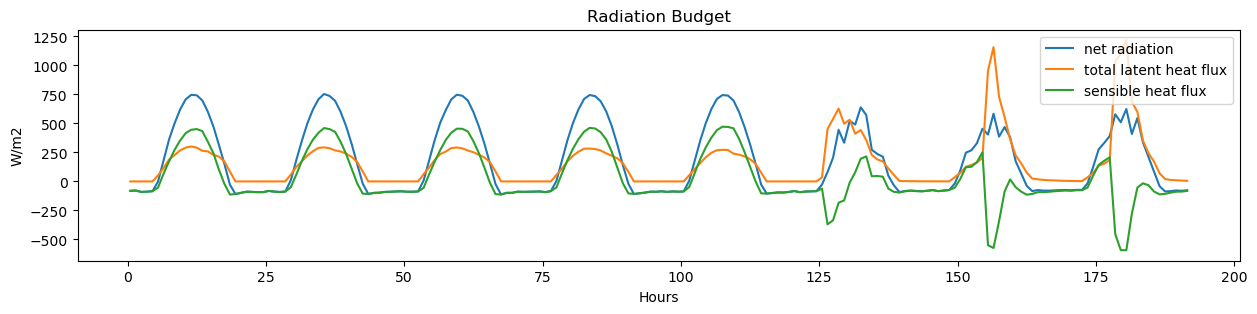

In [40]:
make_multiline_plot(x1=forest_df['Total Hour'], y1=forest_df['Rn'], label1='net radiation',
                    x2=forest_df['Total Hour'], y2=forest_df['labmdaET'], label2='total latent heat flux',
                    x3=forest_df['Total Hour'], y3=forest_df['H'], label3='sensible heat flux',
                    x_label='Hours', y_label='W/m2',
                    title='Radiation Budget', 
                    x_lim=None, y_lim=None)

#### (II) labmdaET and labmdaEi

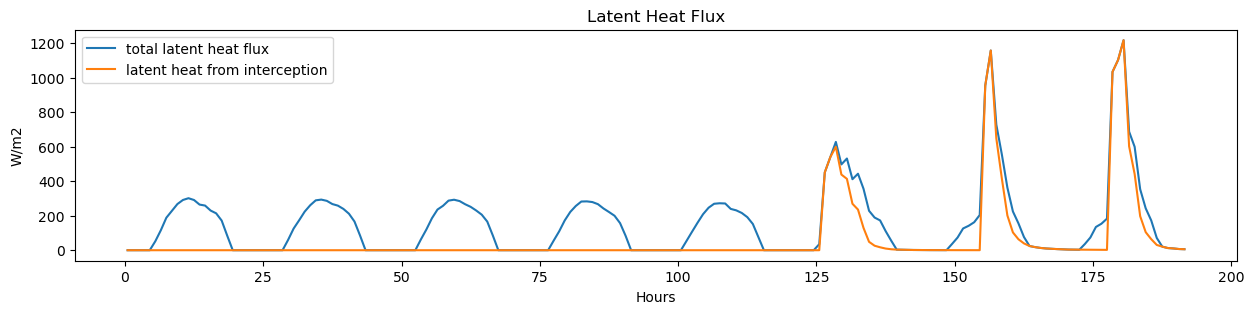

In [41]:
make_multiline_plot(x1=forest_df['Total Hour'], y1=forest_df['labmdaET'], label1='total latent heat flux',
                    x2=forest_df['Total Hour'], y2=forest_df['labmdaEi'], label2='latent heat from interception',
                    x3=None, y3=None, label3=None,
                    x_label='Hours', y_label='W/m2',
                    title='Latent Heat Flux', 
                    x_lim=None, y_lim=None)

#### (III) Precip and Canopy Storage

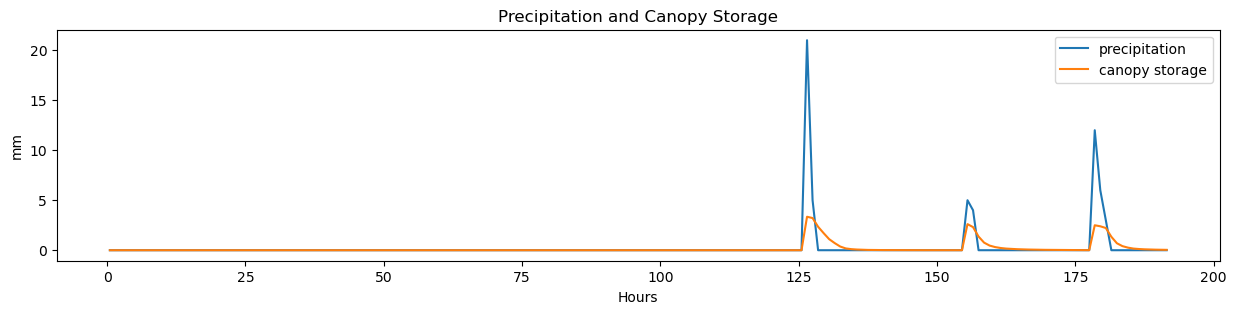

In [42]:
make_multiline_plot(x1=forest_df['Total Hour'], y1=forest_df['precip'], label1='precipitation',
                    x2=forest_df['Total Hour'], y2=forest_df['Cfinal'], label2='canopy storage',
                    x3=None, y3=None, label3=None,
                    x_label='Hours', y_label='mm',
                    title='Precipitation and Canopy Storage', 
                    x_lim=None, y_lim=None)

#### (IV) Canopy Drainage and Soil Moisture

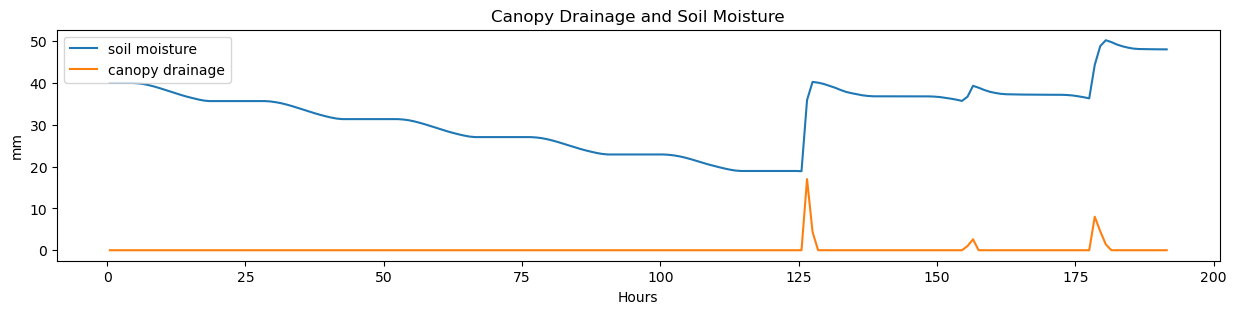

In [43]:
make_multiline_plot(x1=forest_df['Total Hour'], y1=forest_df['SMnew'], label1='soil moisture',
                    x2=forest_df['Total Hour'], y2=forest_df['Dcanopy'], label2='canopy drainage',
                    x3=None, y3=None, label3=None,
                    x_label='Hours', y_label='mm',
                    title='Canopy Drainage and Soil Moisture', 
                    x_lim=None, y_lim=None)

#### (V) gSM

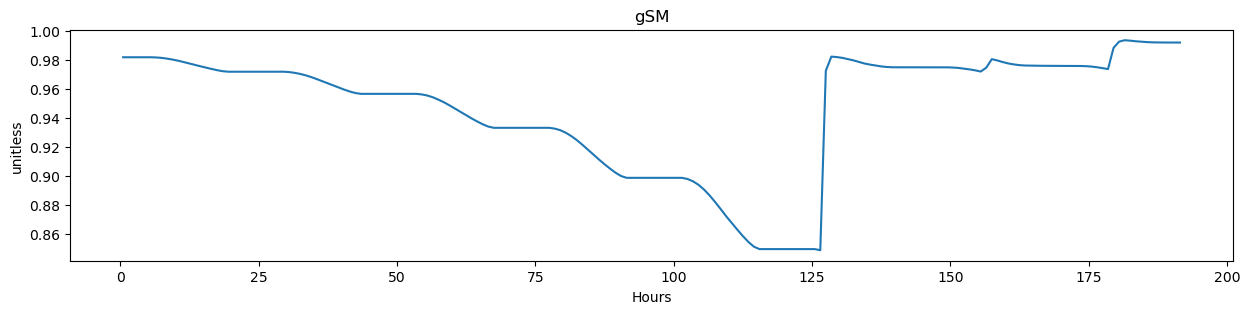

In [44]:
make_single_line_plot(x=forest_df['Total Hour'], y = forest_df['gSM'], 
                      x_label='Hours', y_label='unitless', title='gSM', y_lim=None)

#### (VI) Daily average fluxes 

In [17]:
# setting day number in the dataset
forest_df['day'] = (forest_df['Total Hour'] // 24)  + 1

In [19]:
daily_df_forest = forest_df.groupby('day')[['precip', 'Rn', 'lambdaET', 'H', 'lambdaEi']].mean()
daily_df_forest = daily_df_forest.reset_index()
daily_df_forest['Bowen Ratio'] = daily_df_forest['H'] / daily_df_forest['lambdaET']
daily_df_forest['Fractional contribution of intercepted water'] = daily_df_forest['lambdaEi'] / daily_df_forest['lambdaET']
daily_df_forest

,day,precip,Rn,lambdaET,H,lambdaEi,Bowen Ratio,Fractional contribution of intercepted water
0,1.0,0.000000,215.485220,123.277875,92.207346,0.000000,0.747963,0.000000
1,2.0,0.000000,215.201339,122.541387,92.659952,0.000000,0.756152,0.000000
2,3.0,0.000000,214.750542,122.174705,92.575837,0.000000,0.757733,0.000000
3,4.0,0.000000,214.481403,118.002869,96.478535,0.000000,0.817595,0.000000
4,5.0,0.000000,214.596319,112.229604,102.366715,0.000000,0.912119,0.000000
5,6.0,1.083333,130.971379,194.200587,-63.229207,133.080618,-0.325587,0.685274
6,7.0,0.375000,125.869781,209.770526,-83.900745,152.560135,-0.399964,0.727272
7,8.0,0.875000,149.624638,255.764494,-106.139857,203.505350,-0.414991,0.795675


At the beginning of simulation, soil water storage is maximum, and ET is maximum. The 1st 5 days of simulation has no rainfall, so all ET is sourced from available soil moisture. As soil moisture is the only source of water during the first 5 days, ET depletes with time during this period. Therefore, most of the net radiation becomes SH and SH increases in the first 5 days along with Bowen ratio. The 5th day of simulation has rainfall that replenishes soil moisture. This makes the soil wet and more of the net radiation goes toward latent heat, making SH negative. That’s why during the last 3 days of the simulation, SH is negative and so is the bowen ratio.
During the first 5 days of simulation, there was no rainfall. So, the contribution of intercepted water by canopy to ET is zero. As the last 3 days of simulation, rainfall occurs and canopy intercepts some of it. This intercepted water contributes toward ET and fraction contribution of intercepted water toward ET increases and comprisesmore thany half of ET.
One notable thing is, in forest the absolute value of bowen ratio is comparatively higher than crops. This is because forests are more conservative in transpiring water because of their long life span. So, more net radiation goes towards SH. This helps perseverance of soil moisture in forests as ET is relatively low as the fraction of net radiation. This can be seen in the soil moisture plots. Soil moisture is quickly lost (to zero almost) as ET in absence of rainfall in grass, but in forests only some amount of soil moisture is lost as ET and there is still available soil moisture in soil.l.T.